In [1]:
import codigo
from codigo import utils
from codigo import model_utils
import time

In [2]:
import requests
from multiprocessing.pool import ThreadPool as Pool

sites = [
    'https://github.com/veit/jupyter-tutorial/',
    'https://jupyter-tutorial.readthedocs.io/en/latest/',
    'https://github.com/veit/pyviz-tutorial/',
    'https://pyviz-tutorial.readthedocs.io/de/latest/',
    'https://cusy.io/en',
]

def sitesize(url):
    with requests.get(url) as u:
        return url, len(u.content)

pool = Pool(10)
for result in pool.imap_unordered(sitesize, sites):
    print(result)

('https://jupyter-tutorial.readthedocs.io/en/latest/', 78705)
('https://pyviz-tutorial.readthedocs.io/de/latest/', 32709)
('https://cusy.io/en', 30232)
('https://github.com/veit/pyviz-tutorial/', 194980)
('https://github.com/veit/jupyter-tutorial/', 223405)


In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
X=np.array([1,2,3,4,5,6,7,8,9,10])
Y=np.array([1.1,2.2,3.3,4.4,5.5,6.6,7.7,8.8,9.9,10.1])
Y_label=np.array(['A','C','A','A','B','A','B','A','C','A'])
start_time = time.perf_counter()
utils.downsamplingByLabel(X,Y,Y_label,0.8,'A',True)
finish_time = time.perf_counter()
print("Program finished in {} seconds - using serial".format(finish_time-start_time))

DEBUGING
lenFilter 6
r_times 4
irandom  2
index  2
SI
irandom  1
index  3
NO, segundo intento
index  3
SI
irandom  1
index  5
SI
irandom  3
index  8
Program finished in 0.0025095999999393825 seconds - using serial


In [5]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [6]:
with open('dataset/generado/dataset15min/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [7]:
len(array_Xtrain)

3492368

In [8]:
with open('dataset/generado/dataset15min/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [9]:
len(array_Ytrain)

3492368

In [10]:
array_Ytrain

array([[0.35434783],
       [0.34130435],
       [0.35869565],
       ...,
       [0.7       ],
       [0.69565217],
       [0.69130435]])

In [11]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

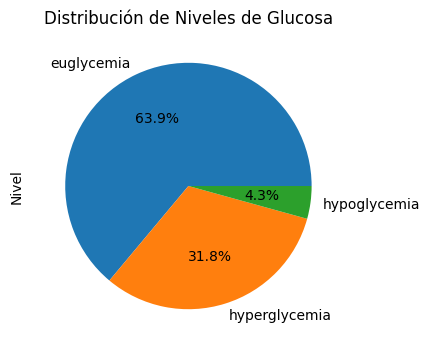

In [12]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [13]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       2232250
hyperglycemia    1110305
hypoglycemia      149813
Name: Nivel, dtype: int64

In [14]:
df_Y_scaled

,Glucose level,Nivel
0,203.0,hyperglycemia
1,197.0,hyperglycemia
2,205.0,hyperglycemia
3,209.0,hyperglycemia
4,204.0,hyperglycemia
...,...,...
3492363,361.0,hyperglycemia
3492364,364.0,hyperglycemia
3492365,362.0,hyperglycemia
3492366,360.0,hyperglycemia


## Paso 1

In [15]:
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [16]:
print(len(XP[2]))

34924


In [17]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

In [18]:
from multiprocessing.pool import ThreadPool as Pool
import time

In [19]:

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 22838
Program finished in 13.740748800000802 seconds - using multiprocessing
1 45101
Program finished in 15.635823500000697 seconds - using multiprocessing
2 67120
Program finished in 15.763624999999593 seconds - using multiprocessing
3 90030
Program finished in 13.203740200000539 seconds - using multiprocessing
4 111758
Program finished in 14.600190299999667 seconds - using multiprocessing
5 133170
Program finished in 15.129639999999199 seconds - using multiprocessing
6 157574
Program finished in 12.319525699999758 seconds - using multiprocessing
7 183399
Program finished in 10.377838400000655 seconds - using multiprocessing
8 209458
Program finished in 10.813905599999998 seconds - using multiprocessing
9 236613
Program finished in 10.058806500000173 seconds - using multiprocessing
10 262941
Program finished in 10.41067860000021 seconds - using multiprocessing
11 288602
Program finished in 11.881831199999397 seconds - using multiprocessing
12 313817
Program finished in 11.9020651000

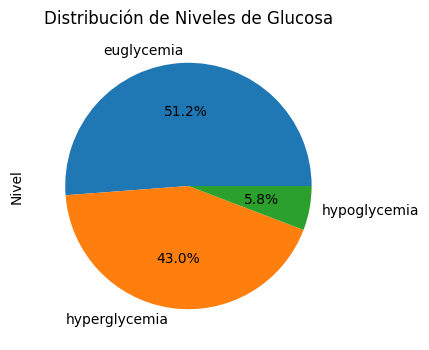

In [20]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [21]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       1322044
hyperglycemia    1110305
hypoglycemia      149813
Name: Nivel, dtype: int64

<AxesSubplot: >

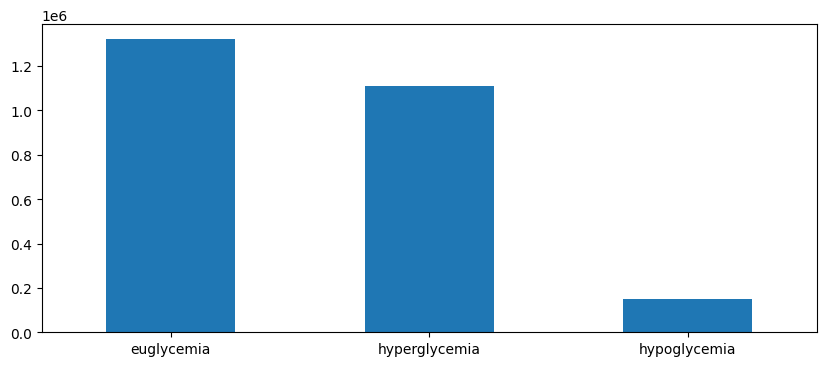

In [22]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [23]:
with open('dataset/generado/dataset15min/array_Xtrain_down.npy', 'wb') as f:
    np.save(f, XNew)

In [24]:
len(XNew)

2582162

In [25]:
with open('dataset/generado/dataset15min/array_Ytrain_down.npy', 'wb') as f:
    np.save(f, YNew)

In [26]:
len(YNew)

2582162

## Paso 2

In [27]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

25822


In [28]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 17633
Program finished in 6.97636969999985 seconds - using multiprocessing
1 34735
Program finished in 9.546588299999712 seconds - using multiprocessing
2 52481
Program finished in 7.128305100000944 seconds - using multiprocessing
3 68764
Program finished in 9.64198149999902 seconds - using multiprocessing
4 84971
Program finished in 9.320252299999993 seconds - using multiprocessing
5 104021
Program finished in 6.825605400001223 seconds - using multiprocessing
6 123943
Program finished in 5.70423590000064 seconds - using multiprocessing
7 144378
Program finished in 6.74678429999949 seconds - using multiprocessing
8 165841
Program finished in 4.669116299999587 seconds - using multiprocessing
9 186955
Program finished in 5.610323099999732 seconds - using multiprocessing
10 207237
Program finished in 7.14842310000131 seconds - using multiprocessing
11 226978
Program finished in 6.308293699999922 seconds - using multiprocessing
12 246475
Program finished in 8.141183900001124 seconds - us

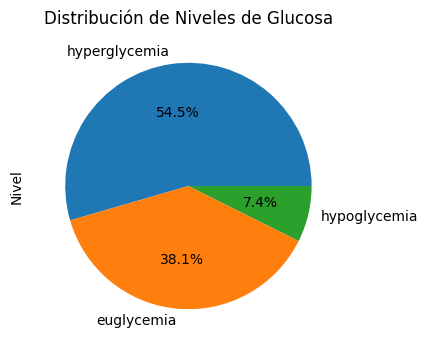

In [29]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [30]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    1110305
euglycemia        776972
hypoglycemia      149813
Name: Nivel, dtype: int64

In [31]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

20371


In [32]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 18734
Program finished in 1.5024945000004664 seconds - using multiprocessing
1 37151
Program finished in 1.9200411999991047 seconds - using multiprocessing
2 56011
Program finished in 1.7692987999998877 seconds - using multiprocessing
3 75693
Program finished in 1.02904800000033 seconds - using multiprocessing
4 92953
Program finished in 3.417846799999097 seconds - using multiprocessing
5 109734
Program finished in 4.115360600000713 seconds - using multiprocessing
6 126000
Program finished in 3.8260497999999643 seconds - using multiprocessing
7 141557
Program finished in 4.322534700000688 seconds - using multiprocessing
8 156740
Program finished in 5.764937800000553 seconds - using multiprocessing
9 173015
Program finished in 4.4899755000005825 seconds - using multiprocessing
10 189113
Program finished in 3.3954042000004847 seconds - using multiprocessing
11 205223
Program finished in 4.902349800000593 seconds - using multiprocessing
12 220394
Program finished in 5.819994000001316 se

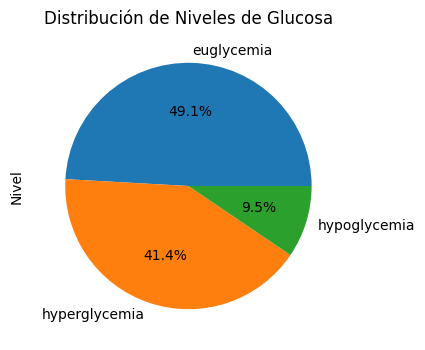

In [33]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [34]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       776972
hyperglycemia    655246
hypoglycemia     149813
Name: Nivel, dtype: int64

In [35]:
with open('dataset/generado/dataset15min/array_Xtrain_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [36]:
with open('dataset/generado/dataset15min/array_Ytrain_down2.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 3

In [37]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

15821
0 11061
Program finished in 3.765008400001534 seconds - using multiprocessing
1 21695
Program finished in 3.862742300001628 seconds - using multiprocessing
2 32506
Program finished in 3.7636395000008633 seconds - using multiprocessing
3 42715
Program finished in 3.355832699999155 seconds - using multiprocessing
4 52640
Program finished in 3.6656574999997247 seconds - using multiprocessing
5 64435
Program finished in 3.447209500000099 seconds - using multiprocessing
6 76837
Program finished in 2.9936304000002565 seconds - using multiprocessing
7 89617
Program finished in 2.8082931000008102 seconds - using multiprocessing
8 102851
Program finished in 2.3192307999997865 seconds - using multiprocessing
9 115952
Program finished in 1.7935613999998168 seconds - using multiprocessing
10 128568
Program finished in 2.6823516999993444 seconds - using multiprocessing
11 140795
Program finished in 3.3911731999996846 seconds - using multiprocessing
12 152791
Program finished in 3.585720600000

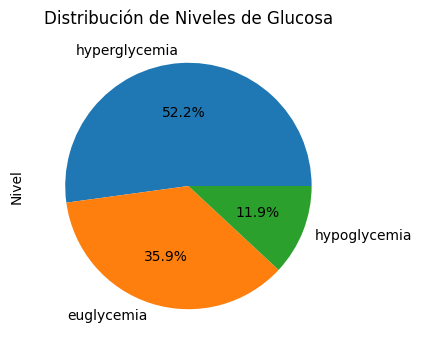

In [38]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [39]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    655246
euglycemia       451143
hypoglycemia     149813
Name: Nivel, dtype: int64

In [40]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

12562
0 11649
Program finished in 1.004018300000098 seconds - using multiprocessing
1 23119
Program finished in 0.8589859999992768 seconds - using multiprocessing
2 34654
Program finished in 0.7873705000001792 seconds - using multiprocessing
3 46842
Program finished in 0.4449971000012738 seconds - using multiprocessing
4 57482
Program finished in 1.4406931999983499 seconds - using multiprocessing
5 68015
Program finished in 1.3568398999996134 seconds - using multiprocessing
6 78246
Program finished in 1.0556833000009647 seconds - using multiprocessing
7 88234
Program finished in 1.3739786000005552 seconds - using multiprocessing
8 97675
Program finished in 2.2481104000016785 seconds - using multiprocessing
9 107669
Program finished in 2.1311329000000114 seconds - using multiprocessing
10 117737
Program finished in 2.123092699999688 seconds - using multiprocessing
11 127681
Program finished in 2.3180646000000706 seconds - using multiprocessing
12 137286
Program finished in 2.48872259999

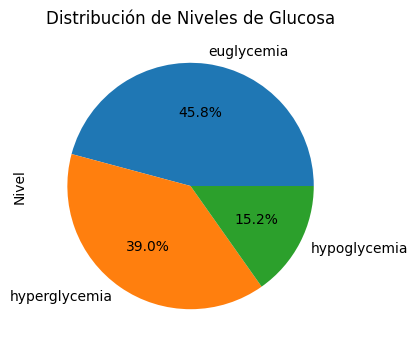

In [41]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [42]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       451143
hyperglycemia    383592
hypoglycemia     149813
Name: Nivel, dtype: int64

In [43]:
with open('dataset/generado/dataset15min/array_Xtrain_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [44]:
with open('dataset/generado/dataset15min/array_Ytrain_down3.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 4

In [45]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

9846
0 7097
Program finished in 1.504355499999292 seconds - using multiprocessing
1 13980
Program finished in 1.4302984999994806 seconds - using multiprocessing
2 20841
Program finished in 1.4863944000007905 seconds - using multiprocessing
3 27255
Program finished in 1.274946399998953 seconds - using multiprocessing
4 33533
Program finished in 0.9917117999993934 seconds - using multiprocessing
5 41042
Program finished in 0.9096606999992218 seconds - using multiprocessing
6 48850
Program finished in 0.9423483000009583 seconds - using multiprocessing
7 57004
Program finished in 0.9355276000005688 seconds - using multiprocessing
8 65449
Program finished in 1.1164858000011009 seconds - using multiprocessing
9 73890
Program finished in 1.2168063999997685 seconds - using multiprocessing
10 81708
Program finished in 1.423027999999249 seconds - using multiprocessing
11 89540
Program finished in 1.403628000000026 seconds - using multiprocessing
12 96979
Program finished in 1.6431759000006423 se

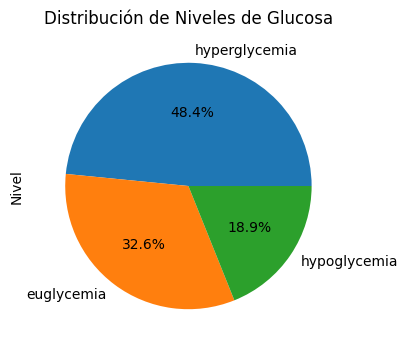

In [46]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [47]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    383592
euglycemia       258536
hypoglycemia     149813
Name: Nivel, dtype: int64

In [48]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

7920
0 7483
Program finished in 0.40044859999943583 seconds - using multiprocessing
1 14721
Program finished in 0.2576078000001871 seconds - using multiprocessing
2 22097
Program finished in 0.2692283000014868 seconds - using multiprocessing
3 29755
Program finished in 0.27420100000017555 seconds - using multiprocessing
4 36592
Program finished in 0.5430668000008154 seconds - using multiprocessing
5 43311
Program finished in 0.579719200000909 seconds - using multiprocessing
6 49942
Program finished in 0.4085079000014957 seconds - using multiprocessing
7 56502
Program finished in 0.46805639999911364 seconds - using multiprocessing
8 62674
Program finished in 0.5509031000001414 seconds - using multiprocessing
9 68937
Program finished in 0.5605739000002359 seconds - using multiprocessing
10 75514
Program finished in 0.5686609000003955 seconds - using multiprocessing
11 81801
Program finished in 0.6486557000007451 seconds - using multiprocessing
12 88112
Program finished in 0.7649252999999

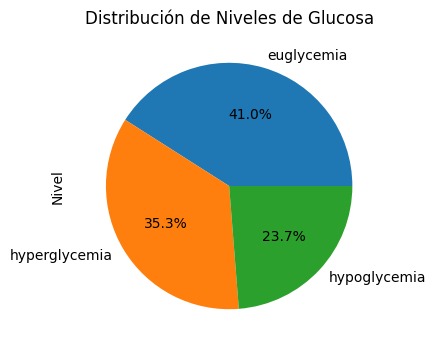

In [49]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [50]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       258536
hyperglycemia    222554
hypoglycemia     149813
Name: Nivel, dtype: int64

In [51]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [52]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'wb') as f:
    np.save(f, YNew)

## Paso 5

Cargamos nuevamente para evitar perder todo el trabajo debido a la demora del proceso

In [84]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [85]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [86]:
len(array_Xtrain)

630903

In [87]:
len(array_Ytrain)

630903

In [88]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

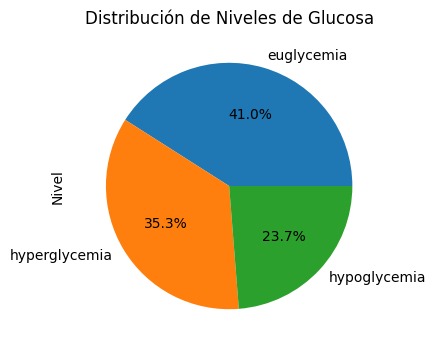

In [89]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [90]:
df_Y_scaled

,Glucose level,Nivel
0,203.0,hyperglycemia
1,204.0,hyperglycemia
2,191.0,hyperglycemia
3,160.0,euglycemia
4,159.0,euglycemia
...,...,...
630898,145.0,euglycemia
630899,208.0,hyperglycemia
630900,198.0,hyperglycemia
630901,210.0,hyperglycemia


In [91]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       258536
hyperglycemia    222554
hypoglycemia     149813
Name: Nivel, dtype: int64

In [92]:

N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.4,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

6310
0 4927
Program finished in 0.21157579999999143 seconds - using multiprocessing
1 9631
Program finished in 0.16604409999854397 seconds - using multiprocessing
2 14282
Program finished in 0.1661714000001666 seconds - using multiprocessing
3 18552
Program finished in 0.2063866999997117 seconds - using multiprocessing
4 22698
Program finished in 0.2199758999995538 seconds - using multiprocessing
5 27742
Program finished in 0.24301150000246707 seconds - using multiprocessing
6 33140
Program finished in 0.18175069999779225 seconds - using multiprocessing
7 38651
Program finished in 0.196323800002574 seconds - using multiprocessing
8 44298
Program finished in 0.19097509999846807 seconds - using multiprocessing
9 49925
Program finished in 0.2432751999986067 seconds - using multiprocessing
10 55366
Program finished in 0.29022039999836124 seconds - using multiprocessing
11 60683
Program finished in 0.2707043000009435 seconds - using multiprocessing
12 65764
Program finished in 0.33365309999

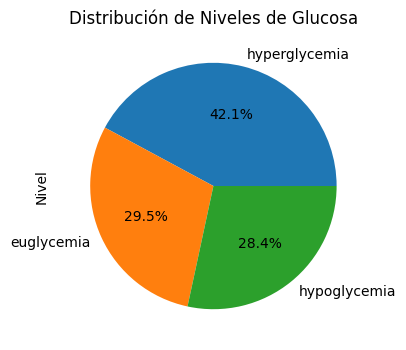

In [93]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [94]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    222554
euglycemia       155742
hypoglycemia     149813
Name: Nivel, dtype: int64

<AxesSubplot: >

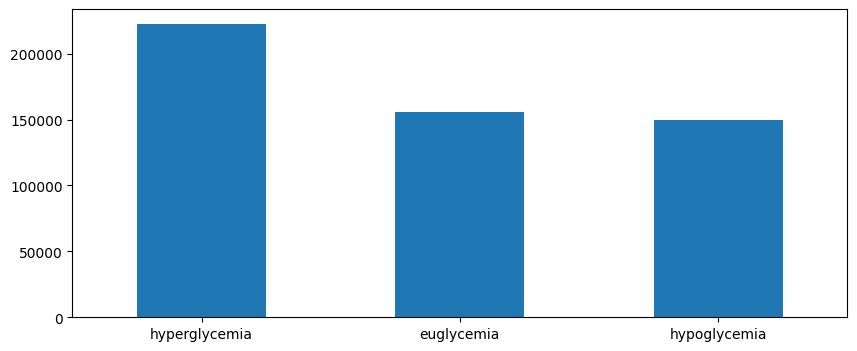

In [95]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [96]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.3,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

5282
0 5157
Program finished in 0.029329200002393918 seconds - using multiprocessing
1 10187
Program finished in 0.05605880000075558 seconds - using multiprocessing
2 15267
Program finished in 0.06870970000090892 seconds - using multiprocessing
3 20448
Program finished in 0.08816379999916535 seconds - using multiprocessing
4 25339
Program finished in 0.12226970000119763 seconds - using multiprocessing
5 30206
Program finished in 0.157698299997719 seconds - using multiprocessing
6 35041
Program finished in 0.1730796999981976 seconds - using multiprocessing
7 39847
Program finished in 0.21940879999965546 seconds - using multiprocessing
8 44555
Program finished in 0.19673690000126953 seconds - using multiprocessing
9 49165
Program finished in 0.23270729999785544 seconds - using multiprocessing
10 53930
Program finished in 0.2485010999989754 seconds - using multiprocessing
11 58566
Program finished in 0.3029175000010582 seconds - using multiprocessing
12 63289
Program finished in 0.2803705

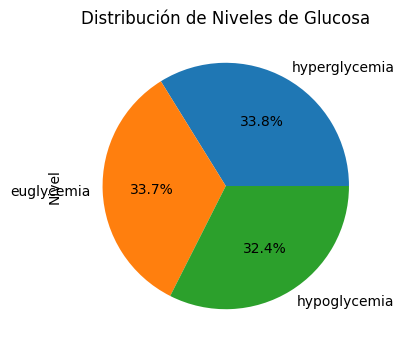

In [97]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [98]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    156217
euglycemia       155742
hypoglycemia     149813
Name: Nivel, dtype: int64

In [99]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'wb') as f:
    np.save(f, XNew)

In [100]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [101]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [103]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [104]:
len(array_Ytrain)

461772

In [105]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

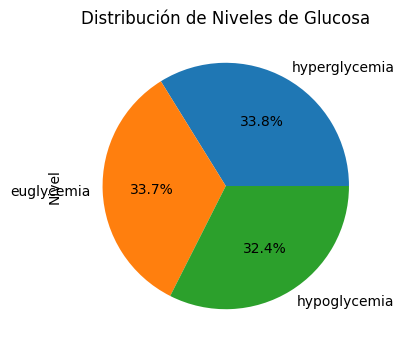

In [106]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [107]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    156217
euglycemia       155742
hypoglycemia     149813
Name: Nivel, dtype: int64

In [108]:
minClass=df_Y_scaled['Nivel'].value_counts().min()

In [109]:
minClass

149813

In [110]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xtrain,array_Ytrain,array_Ytrain_label,0,'hyperglycemia',False,minClass) 

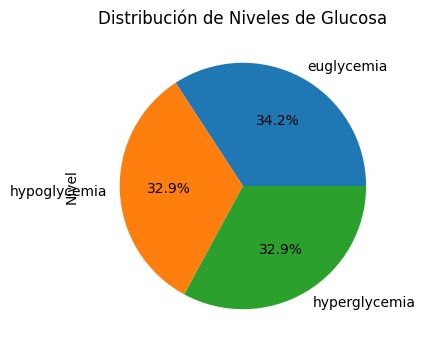

In [111]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [112]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       155742
hypoglycemia     149813
hyperglycemia    149813
Name: Nivel, dtype: int64

In [113]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

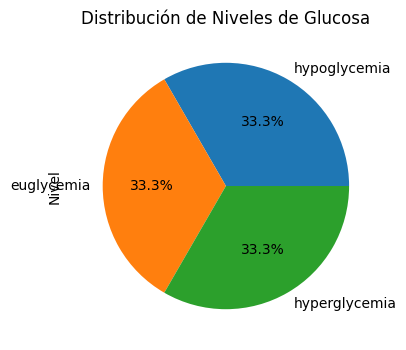

In [114]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [115]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     149813
euglycemia       149813
hyperglycemia    149813
Name: Nivel, dtype: int64

<AxesSubplot: >

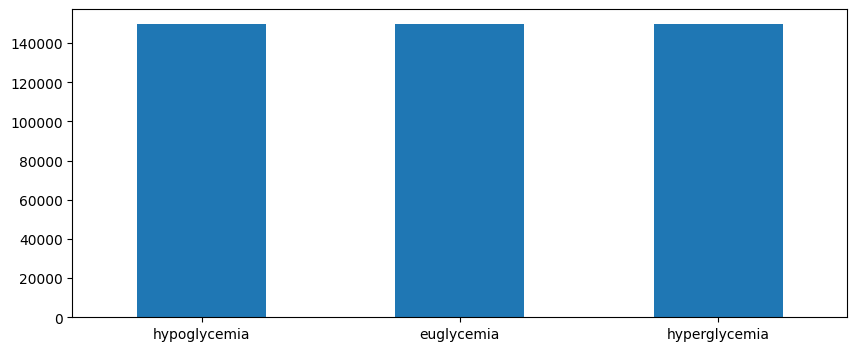

In [116]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [117]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [118]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling on validation dataset

In [119]:
with open('dataset/generado/dataset15min/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [120]:
len(array_Xval)

436549

In [121]:
with open('dataset/generado/dataset15min/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [122]:
len(array_Yval)

436549

In [123]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

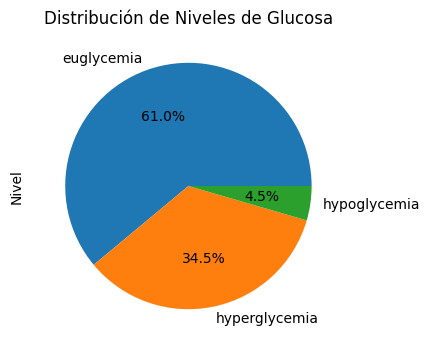

In [124]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [125]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       266498
hyperglycemia    150402
hypoglycemia      19649
Name: Nivel, dtype: int64

<AxesSubplot: >

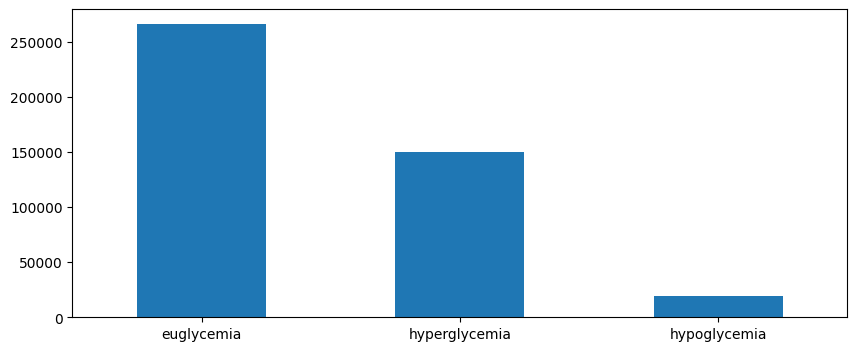

In [126]:
df_Yval_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [127]:
N=100
XP=np.array_split(array_Xval, N) 
YP=np.array_split(array_Yval, N)
Y_labelP=np.array_split( array_YVal_label, N)
print(len(XP[2]))

4366


In [128]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 2794
Program finished in 0.14656270000341465 seconds - using multiprocessing
1 5555
Program finished in 0.15252849999887985 seconds - using multiprocessing
2 8298
Program finished in 0.14604819999658503 seconds - using multiprocessing
3 10958
Program finished in 0.15381999999954132 seconds - using multiprocessing
4 13666
Program finished in 0.16436750000139 seconds - using multiprocessing
5 16413
Program finished in 0.1814457999971637 seconds - using multiprocessing
6 19568
Program finished in 0.2058997999993153 seconds - using multiprocessing
7 22968
Program finished in 0.17749109999931534 seconds - using multiprocessing
8 26254
Program finished in 0.1588329000005615 seconds - using multiprocessing
9 29343
Program finished in 0.1947278000006918 seconds - using multiprocessing
10 32602
Program finished in 0.19030950000160374 seconds - using multiprocessing
11 35823
Program finished in 0.23419700000158628 seconds - using multiprocessing
12 38953
Program finished in 0.23906070000157342

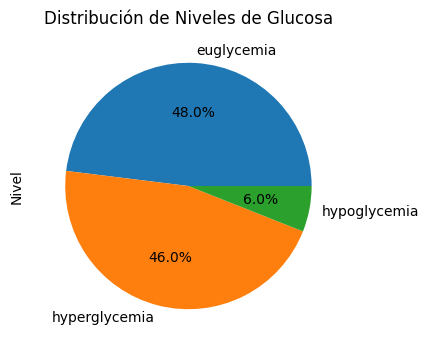

In [129]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [130]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       157251
hyperglycemia    150402
hypoglycemia      19649
Name: Nivel, dtype: int64

In [131]:
with open('dataset/generado/dataset15min/array_Xval_down.npy', 'wb') as f:
    np.save(f, XNew)

In [132]:
with open('dataset/generado/dataset15min/array_Yval_down.npy', 'wb') as f:
    np.save(f, YNew)

In [133]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

3273
0 2159
Program finished in 0.1002187000012782 seconds - using multiprocessing
1 4326
Program finished in 0.10867940000025555 seconds - using multiprocessing
2 6409
Program finished in 0.12875530000019353 seconds - using multiprocessing
3 8475
Program finished in 0.13623789999837754 seconds - using multiprocessing
4 10595
Program finished in 0.13220230000297306 seconds - using multiprocessing
5 13087
Program finished in 0.11257970000224304 seconds - using multiprocessing
6 15805
Program finished in 0.10773469999912777 seconds - using multiprocessing
7 18426
Program finished in 0.12464439999894239 seconds - using multiprocessing
8 20861
Program finished in 0.14041680000082124 seconds - using multiprocessing
9 23521
Program finished in 0.12824389999877894 seconds - using multiprocessing
10 26086
Program finished in 0.14238060000207042 seconds - using multiprocessing
11 28593
Program finished in 0.16793680000046152 seconds - using multiprocessing
12 31103
Program finished in 0.1745580

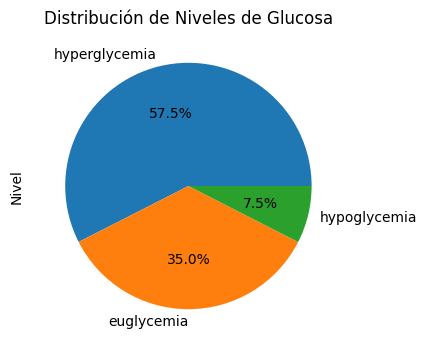

In [134]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [135]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    150402
euglycemia        91516
hypoglycemia      19649
Name: Nivel, dtype: int64

In [136]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

2616
0 2513
Program finished in 0.07387699999890174 seconds - using multiprocessing
1 5046
Program finished in 0.02992380000068806 seconds - using multiprocessing
2 7565
Program finished in 0.04672660000142059 seconds - using multiprocessing
3 9987
Program finished in 0.06105889999889769 seconds - using multiprocessing
4 12049
Program finished in 0.09757710000121733 seconds - using multiprocessing
5 13946
Program finished in 0.11205580000023474 seconds - using multiprocessing
6 15885
Program finished in 0.12286240000321413 seconds - using multiprocessing
7 17972
Program finished in 0.10458080000171321 seconds - using multiprocessing
8 19934
Program finished in 0.12339300000166986 seconds - using multiprocessing
9 22019
Program finished in 0.11926339999990887 seconds - using multiprocessing
10 24000
Program finished in 0.13777130000016768 seconds - using multiprocessing
11 26014
Program finished in 0.1421779999982391 seconds - using multiprocessing
12 28124
Program finished in 0.1478167

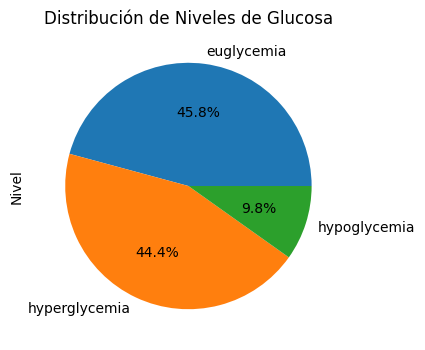

In [137]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [138]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       91516
hyperglycemia    88684
hypoglycemia     19649
Name: Nivel, dtype: int64

In [139]:
with open('dataset/generado/dataset15min/array_Xval_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [140]:
with open('dataset/generado/dataset15min/array_Yval_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [141]:
len(XNew)

199849

<AxesSubplot: >

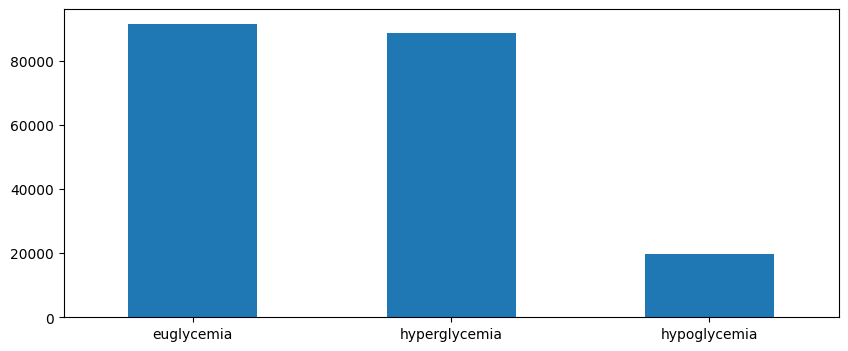

In [142]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [143]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1999
0 1343
Program finished in 0.08499940000183415 seconds - using multiprocessing
1 2703
Program finished in 0.054129799998918315 seconds - using multiprocessing
2 3986
Program finished in 0.06048290000035195 seconds - using multiprocessing
3 5244
Program finished in 0.0677042999996047 seconds - using multiprocessing
4 6532
Program finished in 0.06748909999805619 seconds - using multiprocessing
5 8084
Program finished in 0.05390569999872241 seconds - using multiprocessing
6 9738
Program finished in 0.05605139999897801 seconds - using multiprocessing
7 11343
Program finished in 0.06738430000041262 seconds - using multiprocessing
8 12894
Program finished in 0.06571869999970659 seconds - using multiprocessing
9 14503
Program finished in 0.0703743999983999 seconds - using multiprocessing
10 16082
Program finished in 0.07511510000040289 seconds - using multiprocessing
11 17603
Program finished in 0.0909466999983124 seconds - using multiprocessing
12 19125
Program finished in 0.08512479999

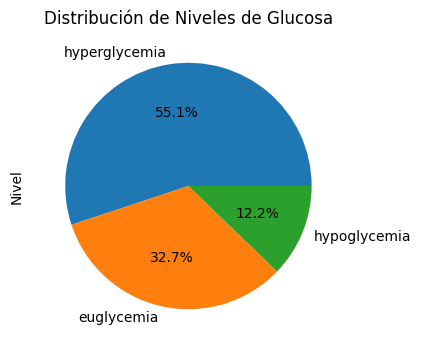

In [144]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [145]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    88684
euglycemia       52627
hypoglycemia     19649
Name: Nivel, dtype: int64

In [146]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1610
0 1552
Program finished in 0.07059940000181086 seconds - using multiprocessing
1 3111
Program finished in 0.034781300000759074 seconds - using multiprocessing
2 4665
Program finished in 0.03999619999740389 seconds - using multiprocessing
3 6172
Program finished in 0.04707540000163135 seconds - using multiprocessing
4 7436
Program finished in 0.0849951999989571 seconds - using multiprocessing
5 8619
Program finished in 0.0961925000010524 seconds - using multiprocessing
6 9822
Program finished in 0.10243939999782015 seconds - using multiprocessing
7 11115
Program finished in 0.10276339999836637 seconds - using multiprocessing
8 12339
Program finished in 0.10565580000184127 seconds - using multiprocessing
9 13636
Program finished in 0.09073350000107894 seconds - using multiprocessing
10 14852
Program finished in 0.10978239999894868 seconds - using multiprocessing
11 16091
Program finished in 0.10953540000264184 seconds - using multiprocessing
12 17389
Program finished in 0.1135705000

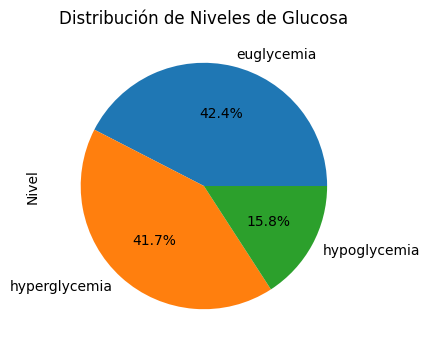

In [147]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [148]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       52627
hyperglycemia    51723
hypoglycemia     19649
Name: Nivel, dtype: int64

In [149]:
with open('dataset/generado/dataset15min/array_Xval_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [150]:
with open('dataset/generado/dataset15min/array_Yval_down3.npy', 'wb') as f:
    np.save(f, YNew)

In [151]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1240
0 879
Program finished in 0.07590789999812841 seconds - using multiprocessing
1 1751
Program finished in 0.04824450000160141 seconds - using multiprocessing
2 2582
Program finished in 0.053216500000417 seconds - using multiprocessing
3 3356
Program finished in 0.05559449999782373 seconds - using multiprocessing
4 4169
Program finished in 0.05590229999870644 seconds - using multiprocessing
5 5114
Program finished in 0.04809469999963767 seconds - using multiprocessing
6 6145
Program finished in 0.04804060000242316 seconds - using multiprocessing
7 7147
Program finished in 0.05468789999940782 seconds - using multiprocessing
8 8106
Program finished in 0.06924509999953443 seconds - using multiprocessing
9 9097
Program finished in 0.06997469999987516 seconds - using multiprocessing
10 10113
Program finished in 0.06998510000266833 seconds - using multiprocessing
11 11044
Program finished in 0.08622280000054161 seconds - using multiprocessing
12 11976
Program finished in 0.088050800000928

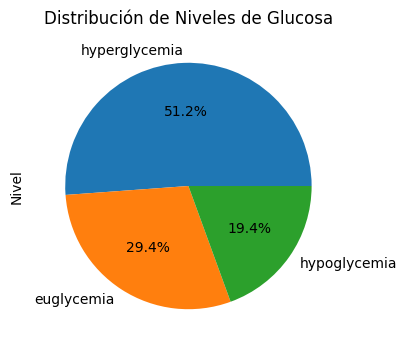

In [152]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [153]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    51723
euglycemia       29734
hypoglycemia     19649
Name: Nivel, dtype: int64

In [154]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1012
0 988
Program finished in 0.03180580000116606 seconds - using multiprocessing
1 1978
Program finished in 0.017073200000595534 seconds - using multiprocessing
2 2951
Program finished in 0.02321789999768953 seconds - using multiprocessing
3 3903
Program finished in 0.027278300000034506 seconds - using multiprocessing
4 4704
Program finished in 0.0409615999997186 seconds - using multiprocessing
5 5468
Program finished in 0.048298899997462286 seconds - using multiprocessing
6 6236
Program finished in 0.051250200001959456 seconds - using multiprocessing
7 7045
Program finished in 0.05326499999864609 seconds - using multiprocessing
8 7826
Program finished in 0.067429999999149 seconds - using multiprocessing
9 8628
Program finished in 0.09683289999884437 seconds - using multiprocessing
10 9398
Program finished in 0.07595880000008037 seconds - using multiprocessing
11 10191
Program finished in 0.07259320000230218 seconds - using multiprocessing
12 11029
Program finished in 0.0804775999968

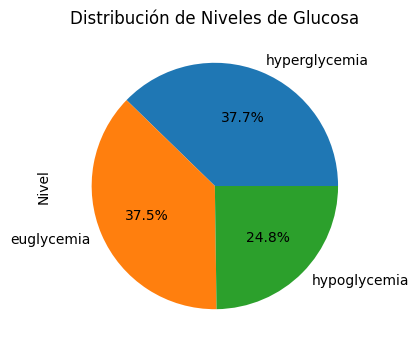

In [155]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [156]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    29909
euglycemia       29734
hypoglycemia     19649
Name: Nivel, dtype: int64

In [157]:
with open('dataset/generado/dataset15min/array_Xval_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [158]:
with open('dataset/generado/dataset15min/array_Yval_down4.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [159]:
with open('dataset/generado/dataset15min/array_Xval_down4.npy', 'rb') as f:
    array_Xval = np.load(f)

In [160]:
len(array_Xval)

79292

In [161]:
with open('dataset/generado/dataset15min/array_Yval_down4.npy', 'rb') as f:
    array_Yval = np.load(f)

In [162]:
len(array_Yval)

79292

In [163]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

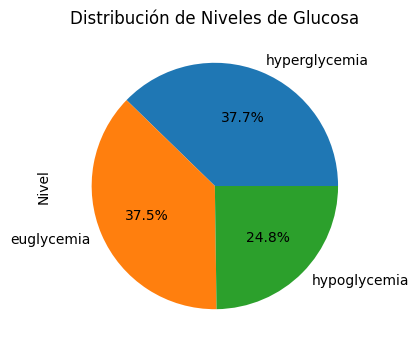

In [164]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [165]:
df_Yval_scaled['Nivel'].value_counts()

hyperglycemia    29909
euglycemia       29734
hypoglycemia     19649
Name: Nivel, dtype: int64

In [166]:
minClass=df_Y_scaled['Nivel'].value_counts().min()
minClass

19649

In [167]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xval,array_Yval,array_YVal_label,0,'hyperglycemia',False,minClass) 

In [168]:
len(YnewLabel)

69032

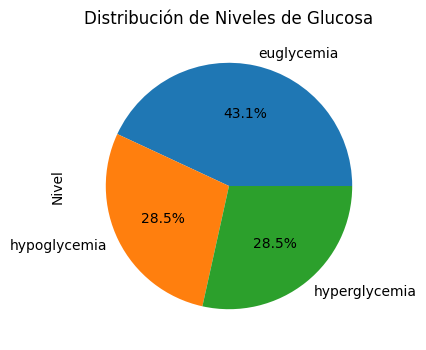

In [169]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [170]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       29734
hypoglycemia     19649
hyperglycemia    19649
Name: Nivel, dtype: int64

In [171]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

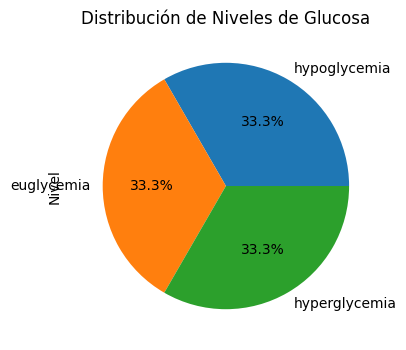

In [172]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [173]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     19649
euglycemia       19649
hyperglycemia    19649
Name: Nivel, dtype: int64

<AxesSubplot: >

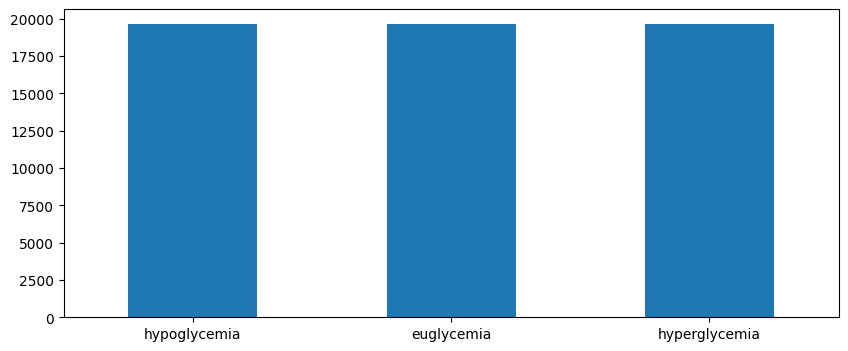

In [174]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [175]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [176]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'wb') as f:
    np.save(f, YNew)